In [22]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

In [2]:
wine = pd.read_csv('winequality/winequality-red.csv',delimiter = ';')
wine_np = wine.to_numpy()

In [3]:
wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [4]:
wine.shape

(1599, 12)

In [5]:
wine.columns


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
quality_binary = []
for i in wine_np[:,11]:
    if i < 6:
        quality_binary.append(0)
    else:
        quality_binary.append(1)
        

In [8]:
wine['quality_binary'] = quality_binary 

In [9]:
wine.sample(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
414             8.8              0.52         0.34             2.7      0.087   
1357            7.3              0.43         0.24             2.5      0.078   
1405            7.7              0.28         0.30             2.0      0.062   
773             7.9              0.40         0.29             1.8      0.157   
1596            6.3              0.51         0.13             2.3      0.076   
314             7.4              0.36         0.29             2.6      0.087   
56             10.2              0.42         0.57             3.4      0.070   
893             7.2              0.66         0.03             2.3      0.078   
238             7.2              0.63         0.00             1.9      0.097   
107             6.2              0.63         0.31             1.7      0.088   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
414                  24.0                 122.0  0.99820  3.26       0.61   
1357                 27.0                  67.0  0.99648  3.60       0.59   
1405                 18.0                  34.0  0.99520  3.28       0.90   
773                   1.0                  44.0  0.99730  3.30       0.92   
1596                 29.0                  40.0  0.99574  3.42       0.75   
314                  26.0                  72.0  0.99645  3.39       0.68   
56                    4.0                  10.0  0.99710  3.04       0.63   
893                  16.0                  86.0  0.99743  3.53       0.57   
238                  14.0                  38.0  0.99675  3.37       0.58   
107                  15.0                  64.0  0.99690  3.46       0.79   

      alcohol  quality  quality_binary  
414       9.5        5               0  
1357     11.1        6               1  
1405     11.3        7               1  
773       9.5        6               1  
1596     11.0        6               1  
314      11.0        5               0  
56        9.6        5               0  
893       9.7        5               0  
238       9.0        6               1  
107       9.3        5               0

In [29]:
wine.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   
quality_binary             0.095093         -0.321441     0.159129   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153794   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.143577   0.203823            -0.060978   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
quality                     0.013732  -0.128907            -0.050656   
quality_binary             -0.002160  -0.109494            -0.061757   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                       0.035533  0.364947 -0.541904   0.312770   
residual sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
quality                          -0.185100 -0.174919 -0.057731   0.251397   
quality_binary                   -0.231963 -0.159110 -0.003264   0.218072   

                       alcohol   quality  quality_binary  
fixed acidity        -0.061668  0.124052        0.095093  
volatile acidity     -0.202288 -0.390558       -0.321441  
citric acid           0.109903  0.226373        0.159129  
residual sugar        0.042075  0.013732       -0.002160  
chlorides            -0.221141 -0.128907       -0.109494  
free sulfur dioxide  -0.069408 -0.050656       -0.061757  
total sulfur dioxide -0.205654 -0.185100       -0.231963  
density              -0.496180 -0.174919       -0.159110  
pH                    0.205633 -0.057731       -0.003264  
sulphates             0.093595  0.251397        0.218072  
alcohol               1.000000  0.476166        0.434751  
quality               0.476166  1.000000        0.848279  
quality_binary        0.434751  0.848279        1.000000

In [38]:
# correlation for a dataframe
correlation = wine.corr()

In [46]:
# define correlation greater than 0.5 as values to look at
criteria = correlation[np.abs(correlation.iloc[:,:]) >= 0.5]

In [45]:
criteria

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000               NaN     0.671703   
volatile acidity                NaN          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar                  NaN               NaN          NaN   
chlorides                       NaN               NaN          NaN   
free sulfur dioxide             NaN               NaN          NaN   
total sulfur dioxide            NaN               NaN          NaN   
density                    0.668047               NaN          NaN   
pH                        -0.682978               NaN    -0.541904   
sulphates                       NaN               NaN          NaN   
alcohol                         NaN               NaN          NaN   
quality                         NaN               NaN          NaN   
quality_binary                  NaN               NaN          NaN   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity                    NaN        NaN                  NaN   
volatile acidity                 NaN        NaN                  NaN   
citric acid                      NaN        NaN                  NaN   
residual sugar                   1.0        NaN                  NaN   
chlorides                        NaN        1.0                  NaN   
free sulfur dioxide              NaN        NaN             1.000000   
total sulfur dioxide             NaN        NaN             0.667666   
density                          NaN        NaN                  NaN   
pH                               NaN        NaN                  NaN   
sulphates                        NaN        NaN                  NaN   
alcohol                          NaN        NaN                  NaN   
quality                          NaN        NaN                  NaN   
quality_binary                   NaN        NaN                  NaN   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                          NaN  0.668047 -0.682978        NaN   
volatile acidity                       NaN       NaN       NaN        NaN   
citric acid                            NaN       NaN -0.541904        NaN   
residual sugar                         NaN       NaN       NaN        NaN   
chlorides                              NaN       NaN       NaN        NaN   
free sulfur dioxide               0.667666       NaN       NaN        NaN   
total sulfur dioxide              1.000000       NaN       NaN        NaN   
density                                NaN  1.000000       NaN        NaN   
pH                                     NaN       NaN  1.000000        NaN   
sulphates                              NaN       NaN       NaN        1.0   
alcohol                                NaN       NaN       NaN        NaN   
quality                                NaN       NaN       NaN        NaN   
quality_binary                         NaN       NaN       NaN        NaN   

                      alcohol   quality  quality_binary  
fixed acidity             NaN       NaN             NaN  
volatile acidity          NaN       NaN             NaN  
citric acid               NaN       NaN             NaN  
residual sugar            NaN       NaN             NaN  
chlorides                 NaN       NaN             NaN  
free sulfur dioxide       NaN       NaN             NaN  
total sulfur dioxide      NaN       NaN             NaN  
density                   NaN       NaN             NaN  
pH                        NaN       NaN             NaN  
sulphates                 NaN       NaN             NaN  
alcohol                   1.0       NaN             NaN  
quality                   NaN  1.000000        0.848279  
quality_binary            NaN  0.848279        1.000000

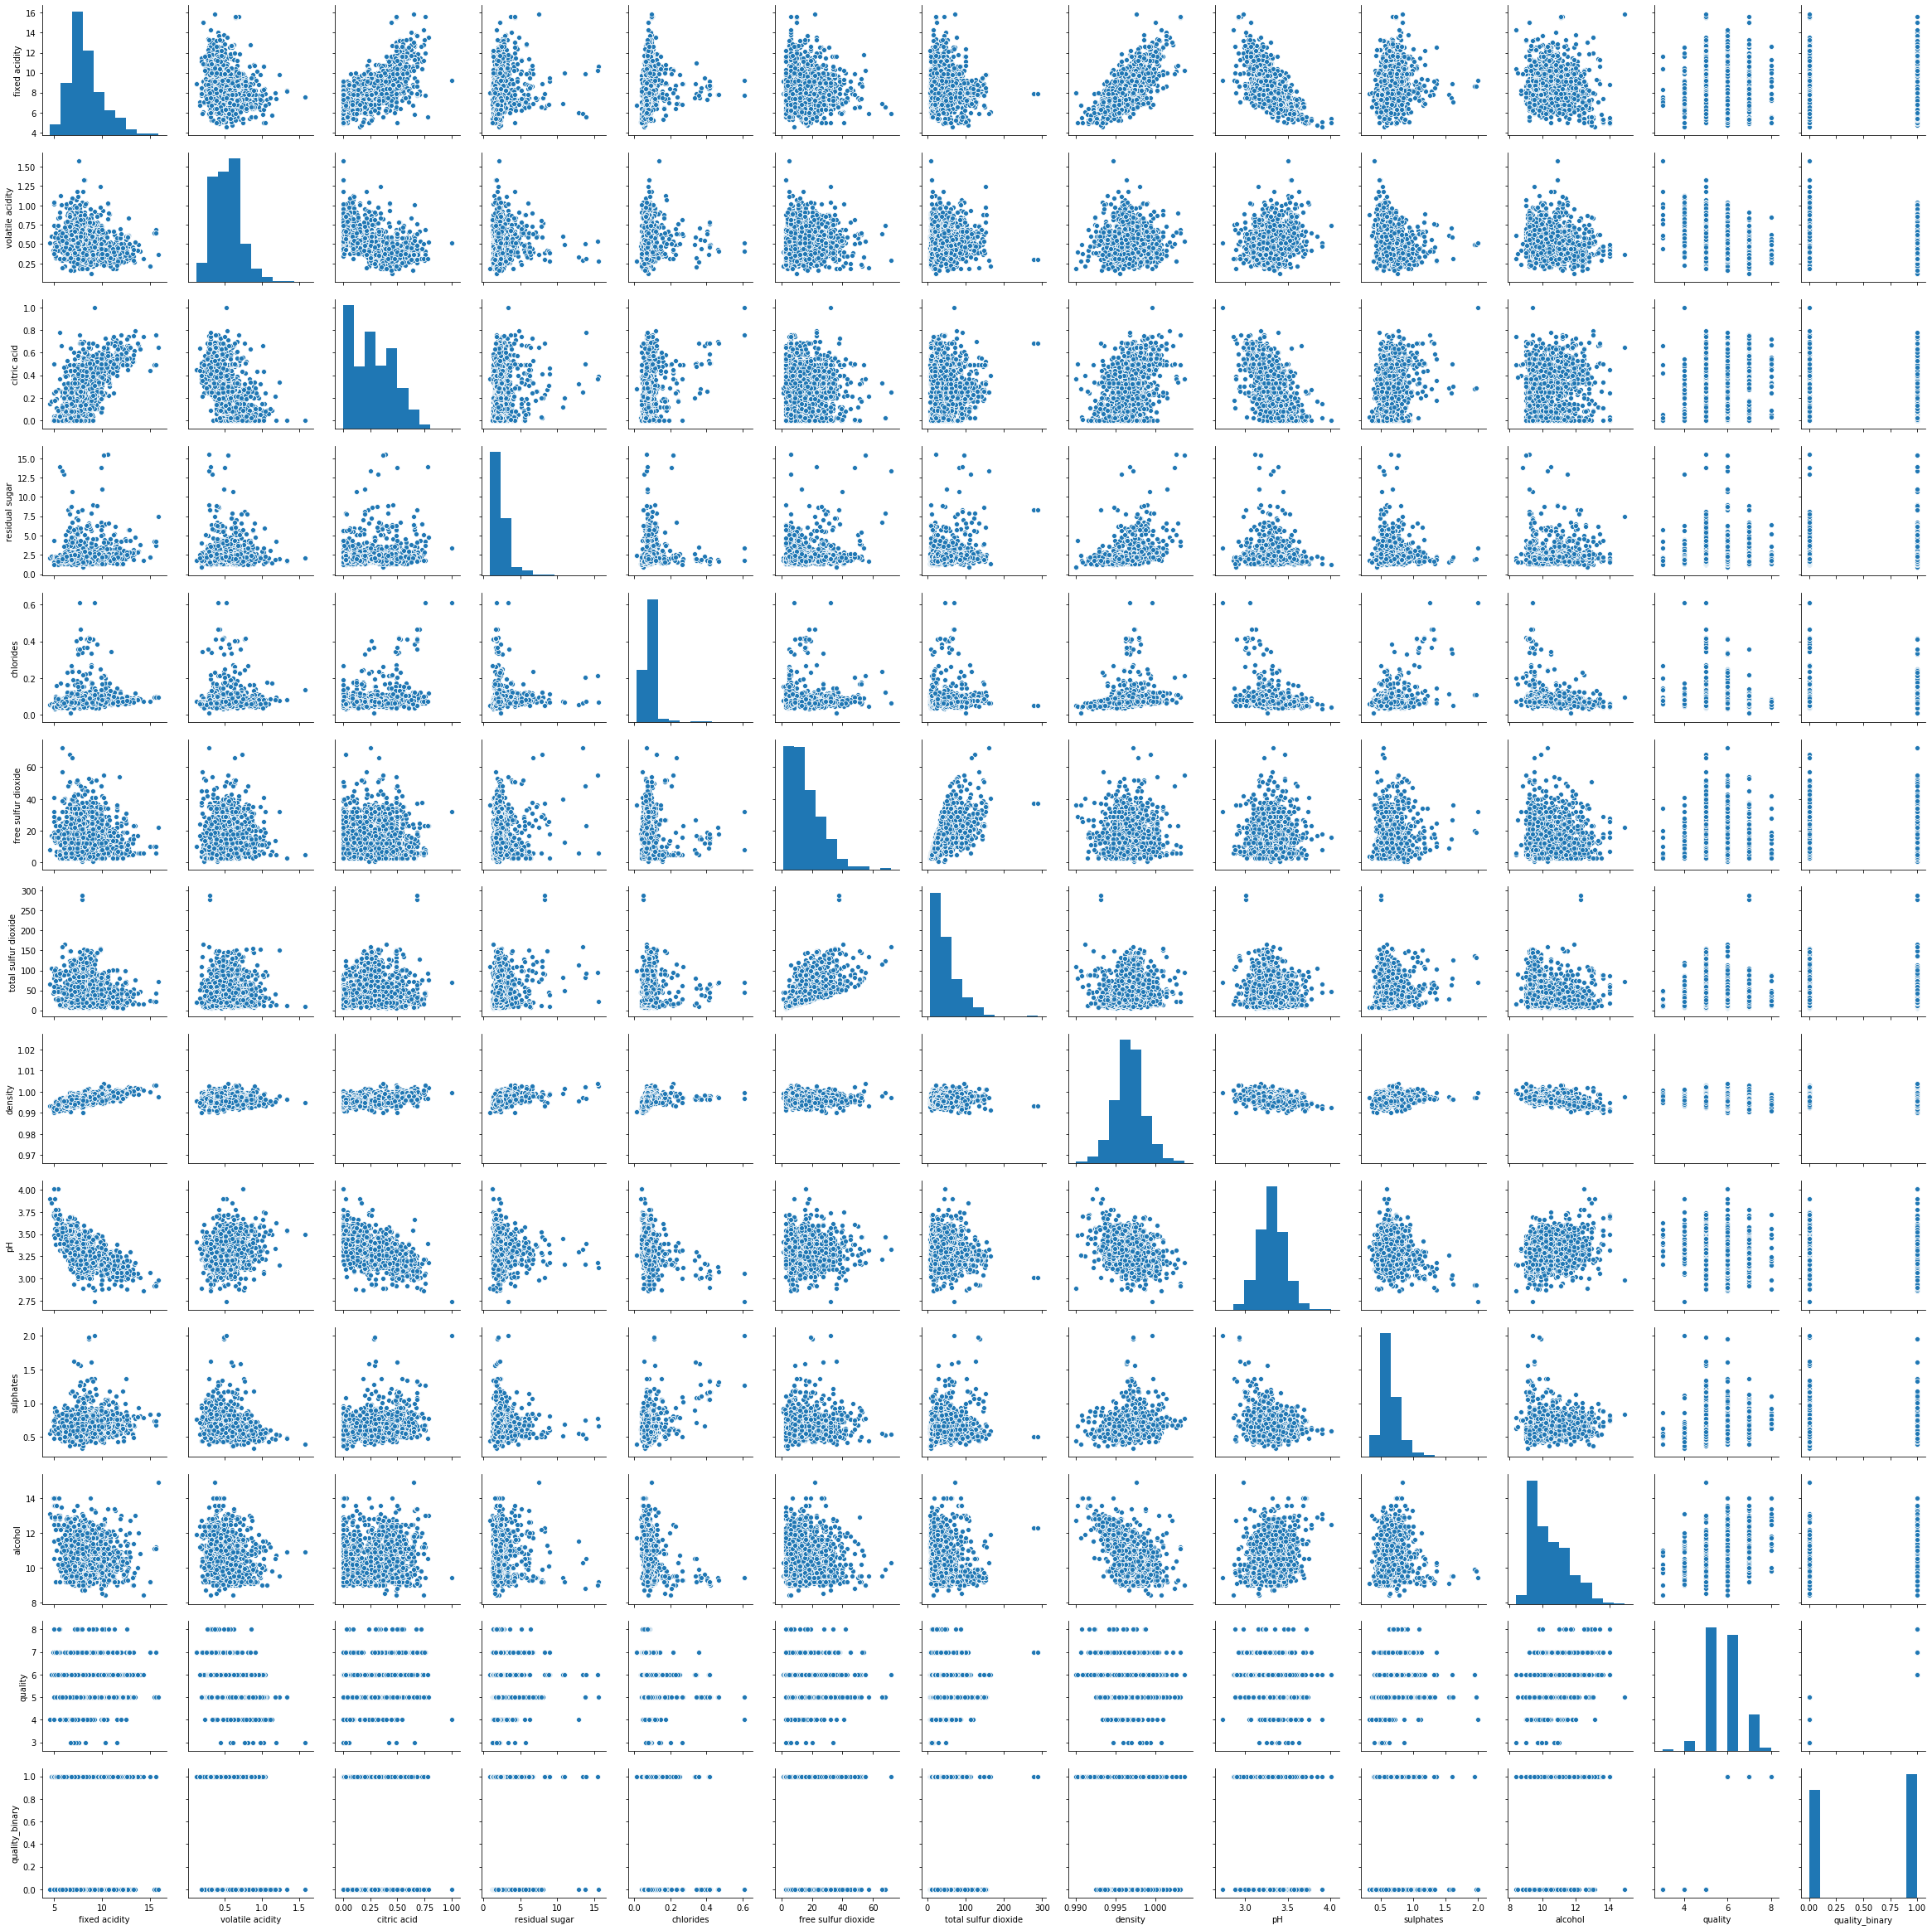

In [11]:
from seaborn import pairplot
pairplot(wine)

In [25]:
# copied from https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-data-frame

wine_clean = wine[(np.abs(stats.zscore(wine))<3).all(axis=1)]

In [27]:
print(wine.shape)
print(wine_clean.shape)

(1599, 13)
(1451, 13)


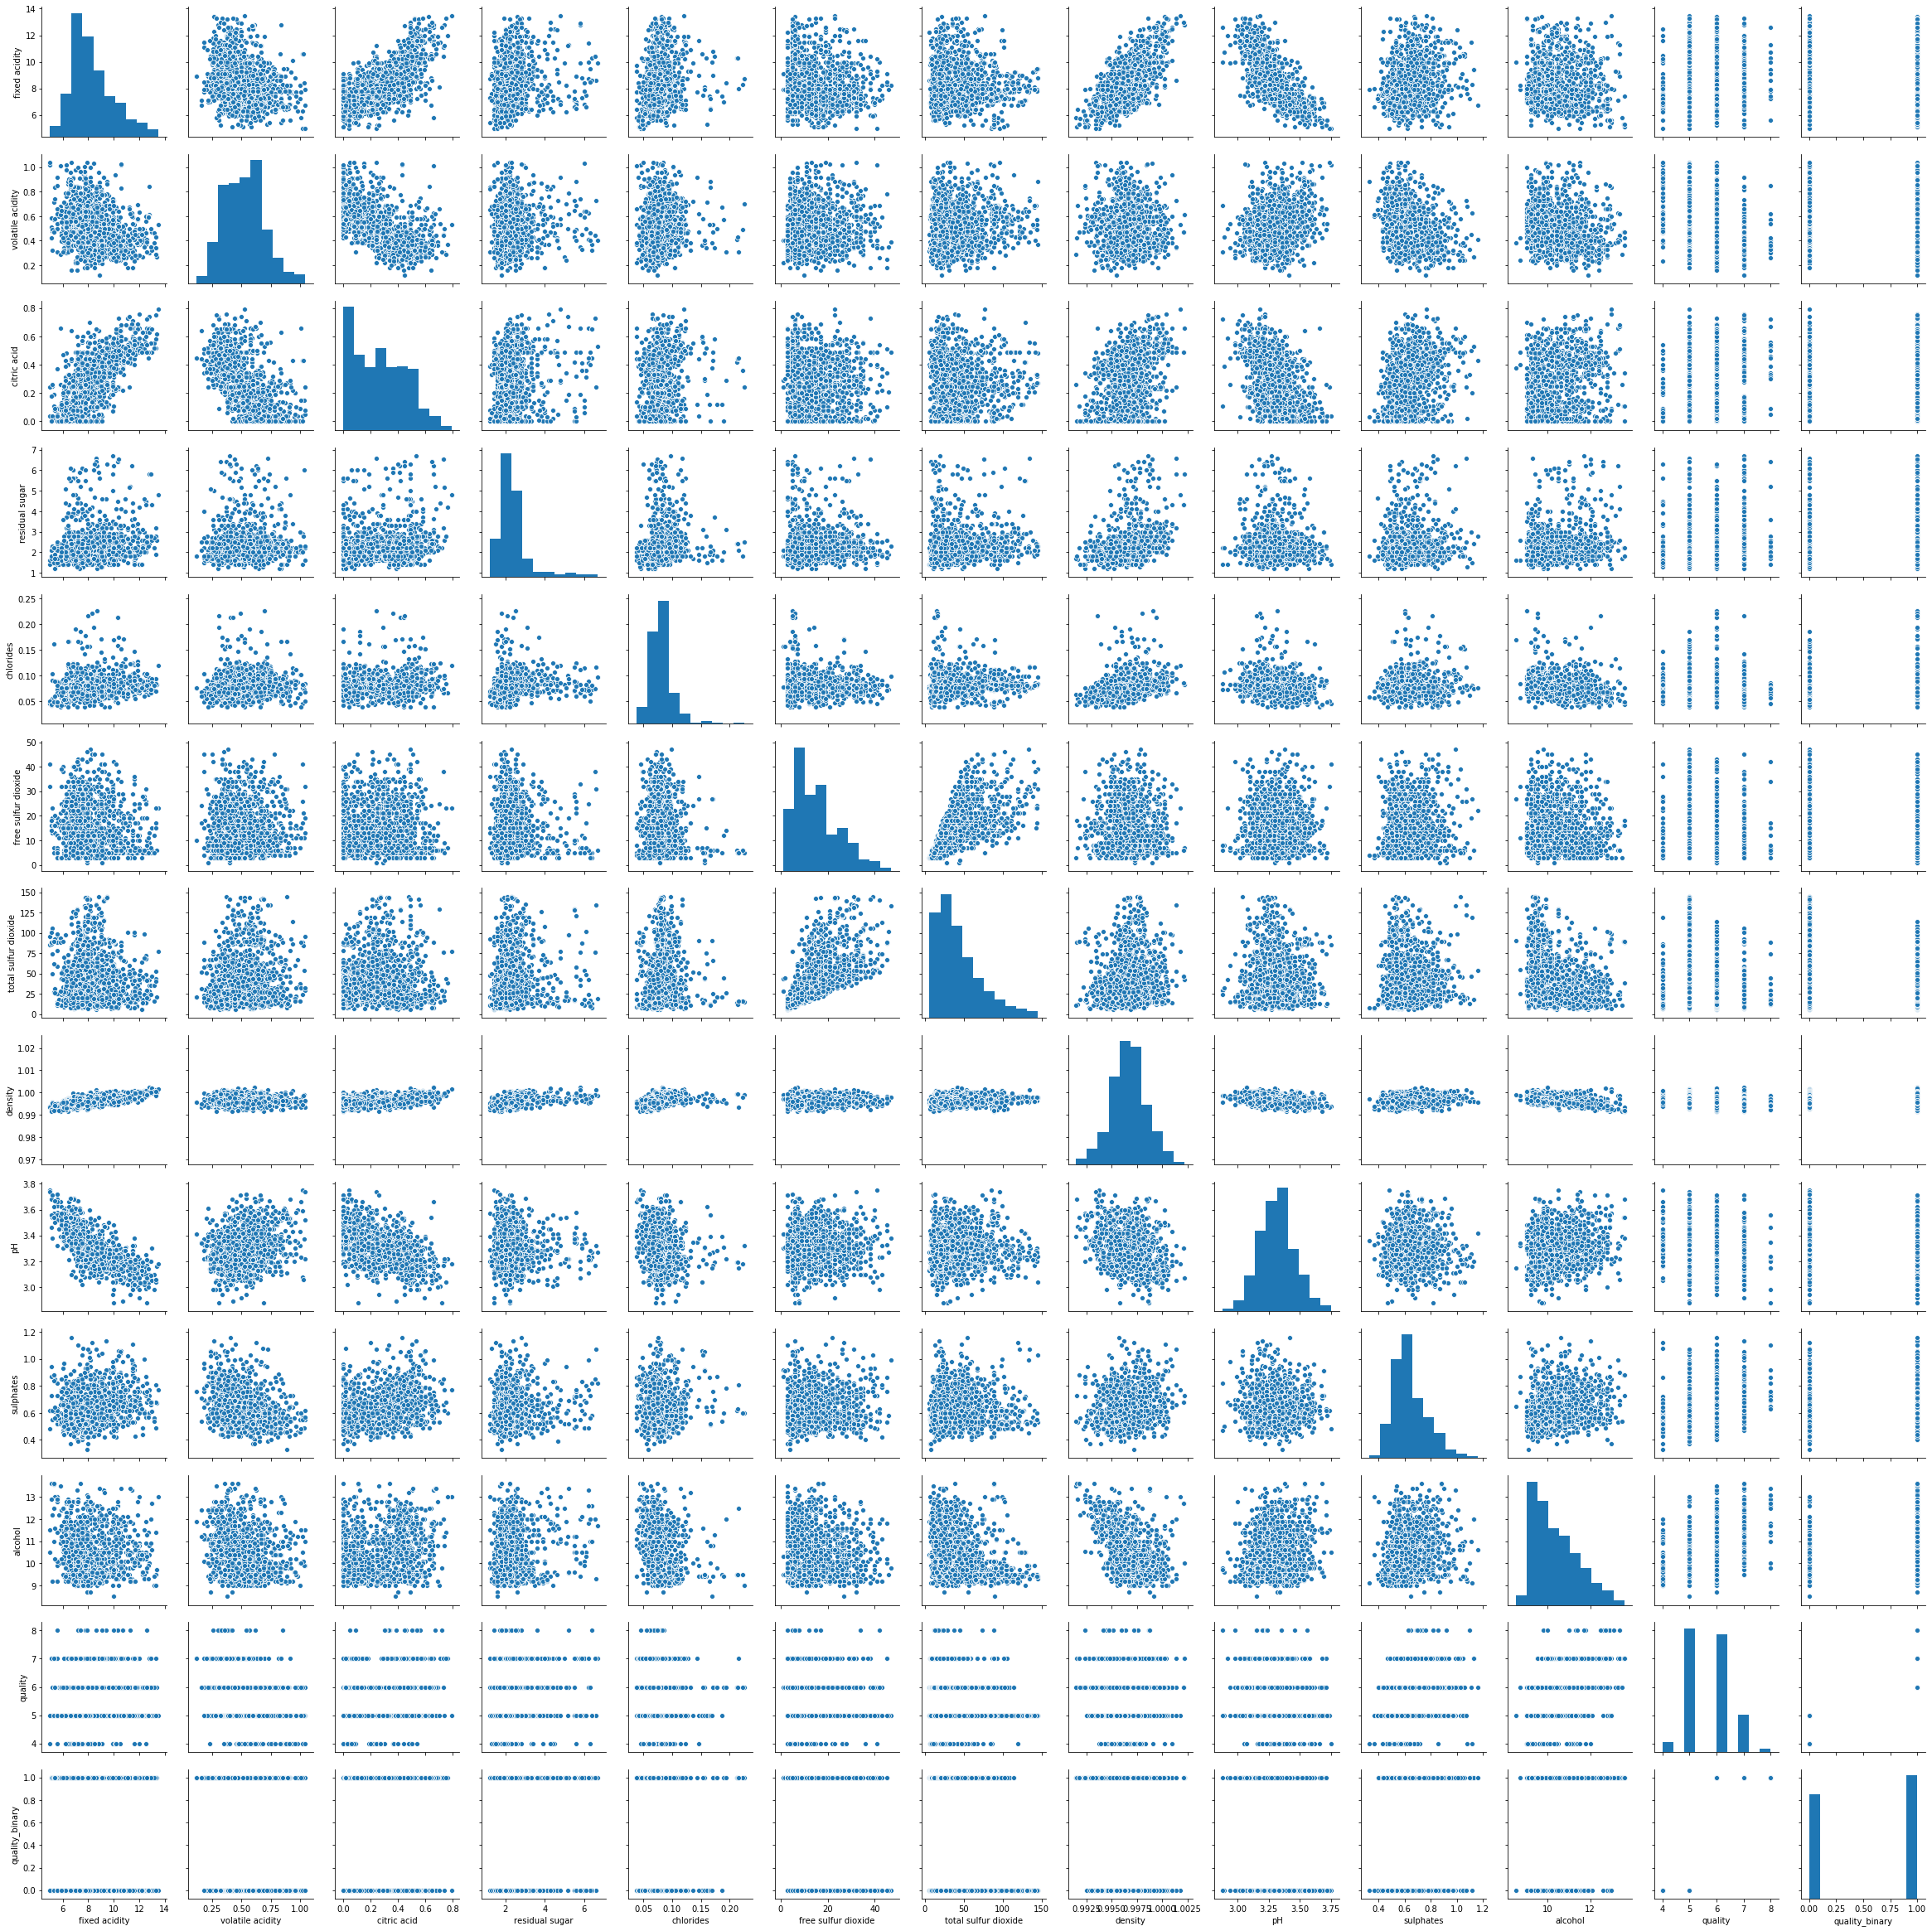

In [28]:
pairplot(wine_clean)

NameError: name '__version__' is not defined

In [19]:
wine['quality_binary'].value_counts()

1    855
0    744
Name: quality_binary, dtype: int64

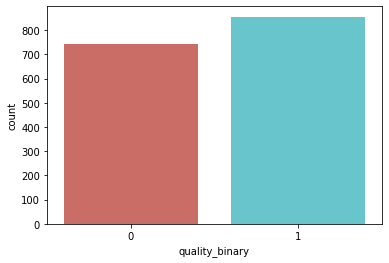

In [13]:
sns.countplot(x = 'quality_binary', data = wine, palette = 'hls')
plt.show()

In [14]:
count_quality_bad = len(wine[wine['quality_binary']==0])
count_quality_good = len(wine[wine['quality_binary']==1])
pct_good = count_quality_good / (count_quality_bad + count_quality_good)*100
pct_bad = count_quality_bad / (count_quality_bad + count_quality_good)*100

print("good: %.2f"% pct_good + '\nbad: %.2f'  % pct_bad) 

good: 53.47
bad: 46.53


In [15]:
# our data set seems balanced, so we can proceed

In [16]:
wine.groupby('quality_binary').mean()

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality_binary                                                                 
0                    8.142204          0.589503     0.237755        2.542070   
1                    8.474035          0.474146     0.299883        2.535965   

                chlorides  free sulfur dioxide  total sulfur dioxide  \
quality_binary                                                         
0                0.092989            16.567204             54.645161   
1                0.082661            15.272515             39.352047   

                 density        pH  sulphates    alcohol   quality  
quality_binary                                                      
0               0.997068  3.311653   0.618535   9.926478  4.901882  
1               0.996467  3.310643   0.692620  10.855029  6.274854

In [17]:
data = wine.to_numpy()
#X = data[:,:len(data[0]-2)]
X = data[:-400,:-2]

y = data[:-400,len(data[0])-1]

In [18]:
y.shape

(1199,)

In [310]:


class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            loss = self.__loss(h, y)
                
            if(self.verbose ==True and i % 10000 == 0):
                print(f'loss: {loss} \t')
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X):
        return self.predict_prob(X).round()



In [320]:
model = LogisticRegression(lr=0.1, num_iter=300000)


In [321]:
%time model.fit(X, y)

/home/harrisonn/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log
/home/harrisonn/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in multiply
/home/harrisonn/.local/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


CPU times: user 9min 40s, sys: 7min 51s, total: 17min 31s
Wall time: 6min 4s


ValueError: shapes (2500,3) and (12,) not aligned: 3 (dim 1) != 12 (dim 0)

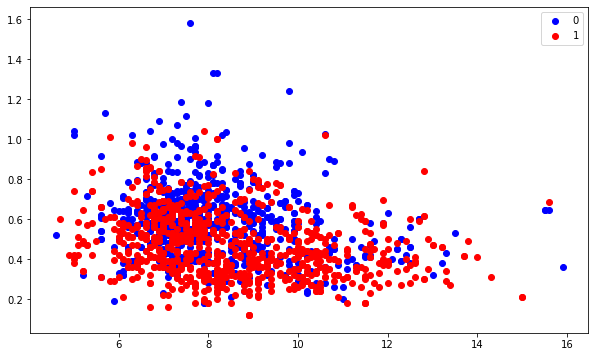

In [183]:

plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend()
x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = model.predict_prob(grid).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');



In [313]:
model.theta

array([-3.33157773,  0.08999306, -8.5039647 , -4.1533329 , -0.18530933,
       -4.31299058,  0.18026117, -0.0377631 , -3.31054957, -4.27936076,
        5.48020346,  2.44655231])

In [314]:
model.predict(X[-400:])

array([1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [315]:
prediction = []
for i in model.predict_prob(X[-400:]):
    if i < 0.5:
        prediction.append(0)
    else:
        prediction.append(1)

In [316]:
prediction_data = pd.DataFrame({'pred': validation})
actual_data = pd.DataFrame({'actual': data[-400:,12].astype(int)})


In [317]:
prediction_data

pred
0       1
1       1
2       1
3       1
4       1
..    ...
395     0
396     1
397     1
398     1
399     1

[400 rows x 1 columns]

In [318]:
results = prediction_data.where(prediction_data.values==actual_data.values).notna()

In [319]:
results['pred'].value_counts()

True     201
False    199
Name: pred, dtype: int64

In [190]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
model = LogisticRegression()
model.fit(X, y)
#predicted_classes = model.predict(X)
#accuracy = accuracy_score(y.flatten(),predicted_classes)
parameters = model.coef_

/home/harrisonn/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [191]:
print(parameters)

[[-0.0045973  -2.8864663  -0.75532718  0.02420795 -1.63678695  0.02545084
  -0.01810072 -1.40642514 -1.5530993   1.93964574  0.88267793]]


In [95]:
df1 = wine.select_dtypes(exclude = 'float64')

In [96]:
df1.select_dtypes(exclude = 'integer')

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[1599 rows x 0 columns]

In [23]:
col_names = ['sample_code', 'clump_thick', 'uni_cell_size', 'uni_cell_shape','marg_adhes', 'single_epi_cell_size', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']
breast = pd.read_csv('breast-cancer-wisconsin.data',delimiter = ',', names = col_names)


In [24]:
breast.head()

sample_code  clump_thick  uni_cell_size  uni_cell_shape  marg_adhes  \
0      1000025            5              1               1           1   
1      1002945            5              4               4           5   
2      1015425            3              1               1           1   
3      1016277            6              8               8           1   
4      1017023            4              1               1           3   

   single_epi_cell_size bare_nuclei  bland_chromatin  normal_nucleoli  \
0                     2           1                3                1   
1                     7          10                3                2   
2                     2           2                3                1   
3                     3           4                3                7   
4                     2           1                3                1   

   mitoses  class  
0        1      2  
1        1      2  
2        1      2  
3        1      2  
4        1      2

In [25]:
breast.shape

(699, 11)

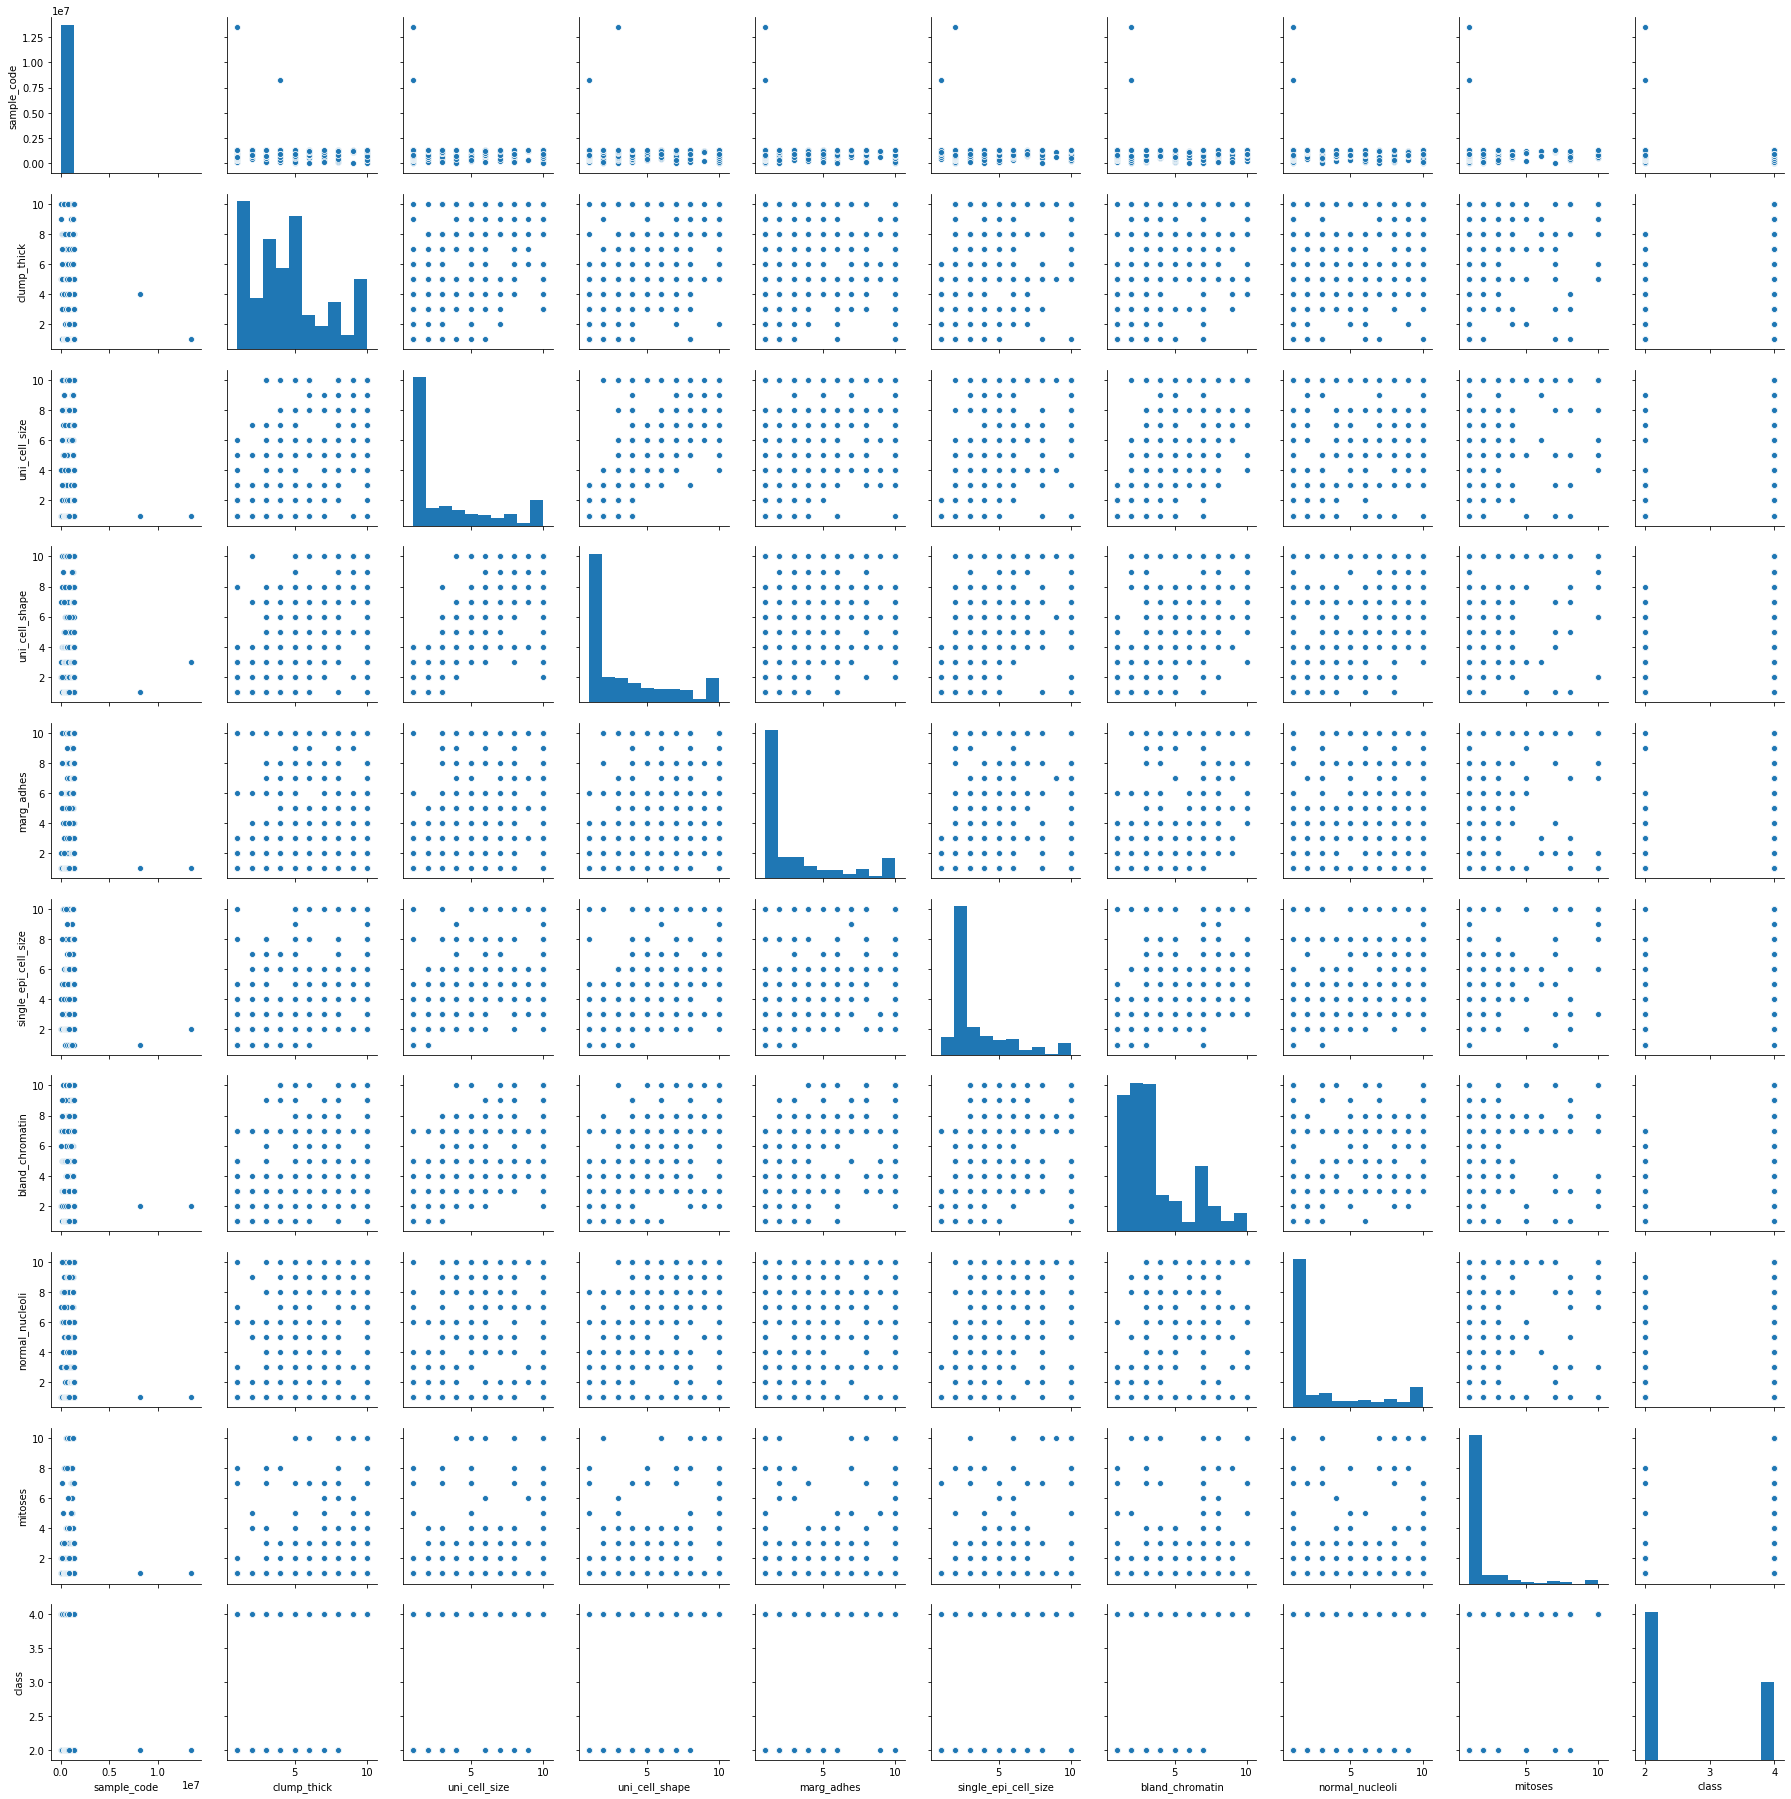

In [13]:
from seaborn import pairplot
pairplot(breast)

In [47]:
breast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
sample_code             699 non-null int64
clump_thick             699 non-null int64
uni_cell_size           699 non-null int64
uni_cell_shape          699 non-null int64
marg_adhes              699 non-null int64
single_epi_cell_size    699 non-null int64
bare_nuclei             699 non-null object
bland_chromatin         699 non-null int64
normal_nucleoli         699 non-null int64
mitoses                 699 non-null int64
class                   699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [48]:
breast["bare_nuclei"]

0       1
1      10
2       2
3       4
4       1
       ..
694     2
695     1
696     3
697     4
698     5
Name: bare_nuclei, Length: 699, dtype: object

# H1 header
## h2 header
### h3 header
Here is my lab
* item 1
* item 2
* *italicize* item 3